In [5]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import scipy.stats as stats
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
conn = sqlite3.connect('database.sqlite')
data = pd.read_sql_query("SELECT * From Match",conn)

In [7]:
print(data.head())
print(data.shape)

   id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   
3   4           1          1  2008/2009      1  2008-08-17 00:00:00   
4   5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...   \
0        492473              9987              9993               1  ...    
1        492474             10000              9994               0  ...    
2        492475              9984              8635               0  ...    
3        492476              9991              9998               5  ...    
4        492477              7947              9985               1  ...    

    SJA   VCH   VCD   VCA   GBH   GBD   GBA   BSH   BSD   BSA  
0  4.00  1.65  3.40  4.50  1.78  3.25  4.00  1

In [5]:
data.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)

In [6]:
data1 = data[['home_team_api_id', 'away_team_api_id', 'goal', 'home_team_goal', 'away_team_goal']]
data1
data5 = pd.DataFrame()
data5 = data5.fillna(0)

In [7]:
print(data1.goal[1728])

<goal><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>406</event_incident_typefk><elapsed>22</elapsed><player2>38807</player2><subtype>header</subtype><player1>37799</player1><sortorder>5</sortorder><team>10261</team><id>378998</id><n>295</n><type>goal</type><goal_type>n</goal_type></value><value><comment>n</comment><stats><goals>1</goals><shoton>1</shoton></stats><event_incident_typefk>393</event_incident_typefk><elapsed>24</elapsed><player2>24154</player2><subtype>shot</subtype><player1>24148</player1><sortorder>4</sortorder><team>10260</team><id>379019</id><n>298</n><type>goal</type><goal_type>n</goal_type></value></goal>


In [8]:
test1 = pd.read_sql("SELECT home_team_goal, away_team_goal, home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11 FROM Match JOIN Player on Player.player_api_id = Match.home_player_1", conn)

In [9]:
test1

,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,1,1,39890,NaN,38788.0,38312.0,26235.0,NaN,NaN,NaN,...,38388.0,26458.0,13423.0,38389.0,38798.0,30949.0,38253.0,106013.0,38383.0,46552.0
1,2,1,38327,67950.0,67958.0,67959.0,37112.0,36393.0,148286.0,67898.0,...,38293.0,148313.0,104411.0,148314.0,37202.0,43158.0,9307.0,42153.0,32690.0,38782.0
2,3,0,95597,NaN,NaN,38435.0,94462.0,46004.0,164732.0,NaN,...,39156.0,39151.0,166554.0,15652.0,39145.0,46890.0,38947.0,46881.0,39158.0,119118.0
3,0,1,30934,38292.0,11569.0,38273.0,14642.0,38945.0,38290.0,95609.0,...,27838.0,36841.0,38337.0,NaN,33662.0,37044.0,32760.0,38229.0,12574.0,46335.0
4,2,1,37990,37983.0,21812.0,11736.0,37858.0,39578.0,38336.0,38366.0,...,46580.0,38247.0,16387.0,94284.0,NaN,45832.0,33671.0,163670.0,33622.0,148336.0
5,3,0,38391,36849.0,NaN,36845.0,38322.0,38371.0,36852.0,38784.0,...,67940.0,46231.0,67939.0,NaN,38249.0,39625.0,39859.0,40521.0,148302.0,148329.0
6,4,0,39153,39575.0,46459.0,26606.0,15913.0,15662.0,178291.0,45413.0,...,94184.0,15456.0,NaN,NaN,37085.0,37972.0,148292.0,148289.0,17703.0,94281.0
7,1,1,37900,37886.0,37903.0,37889.0,94030.0,37902.0,38231.0,131530.0,...,38349.0,21834.0,37953.0,38339.0,30404.0,38353.0,38348.0,NaN,37025.0,17883.0
8,1,3,36835,37047.0,37021.0,37051.0,104386.0,32863.0,37957.0,37909.0,...,21812.0,11736.0,37858.0,38366.0,37983.0,39578.0,38336.0,52280.0,27423.0,38440.0
9,0,1,38252,39156.0,39151.0,68064.0,166554.0,NaN,46890.0,39158.0,...,30692.0,38800.0,37861.0,47411.0,35412.0,39631.0,39591.0,119117.0,25957.0,38369.0


In [10]:
test2 = pd.read_sql("Select player_api_id, player_name FROM Player", conn)
test2

,player_api_id,player_name
0,505942,Aaron Appindangoye
1,155782,Aaron Cresswell
2,162549,Aaron Doran
3,30572,Aaron Galindo
4,23780,Aaron Hughes
5,27316,Aaron Hunt
6,564793,Aaron Kuhl
7,30895,Aaron Lennon
8,528212,Aaron Lennox
9,101042,Aaron Meijers


In [11]:
data3 = pd.read_sql_query("SELECT player_fifa_api_id, player_api_id, overall_rating From Player_Attributes",conn)
data4 = data3.groupby('player_fifa_api_id').mean()
data4
pd.merge(data4, test2, on='player_api_id')

C:\Users\Jon\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:962: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)


,player_api_id,overall_rating,player_name
0,39357.0,70.600000,Giovanni Pasquale
1,41762.0,72.125000,Alessio Scarpi
2,26028.0,67.352941,Romain Rocchi
3,24852.0,74.125000,Luis Garcia
4,30630.0,76.500000,Joe Cole
5,101983.0,70.050000,Manu Herrera
6,30955.0,88.320000,Andres Iniesta
7,30668.0,71.217391,Guy Demel
8,38243.0,68.500000,David Odonkor
9,24217.0,77.692308,Emre Belozoglu


In [12]:
data4['overall_rating'].mean()

66.82029308570667

In [13]:
s = data4.set_index('player_api_id')['overall_rating']
test1['home_player_1'] = test1['home_player_1'].replace(s)
test1['home_player_2'] = test1['home_player_2'].replace(s)
test1['home_player_3'] = test1['home_player_3'].replace(s)
test1['home_player_4'] = test1['home_player_4'].replace(s)
test1['home_player_5'] = test1['home_player_5'].replace(s)
test1['home_player_6'] = test1['home_player_6'].replace(s)
test1['home_player_7'] = test1['home_player_7'].replace(s)
test1['home_player_8'] = test1['home_player_8'].replace(s)
test1['home_player_9'] = test1['home_player_9'].replace(s)
test1['home_player_10'] = test1['home_player_10'].replace(s)
test1['home_player_11'] = test1['home_player_11'].replace(s)
test1['away_player_1'] = test1['away_player_1'].replace(s)
test1['away_player_2'] = test1['away_player_2'].replace(s)
test1['away_player_3'] = test1['away_player_3'].replace(s)
test1['away_player_4'] = test1['away_player_4'].replace(s)
test1['away_player_5'] = test1['away_player_5'].replace(s)
test1['away_player_6'] = test1['away_player_6'].replace(s)
test1['away_player_7'] = test1['away_player_7'].replace(s)
test1['away_player_8'] = test1['away_player_8'].replace(s)
test1['away_player_9'] = test1['away_player_9'].replace(s)
test1['away_player_10'] = test1['away_player_10'].replace(s)
test1['away_player_11'] = test1['away_player_11'].replace(s)

test2 = test1.fillna(66.82029308570667)
#t2 = test1.sum(axis=1)
test2

,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,...,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,1,1,65.200000,66.820293,63.428571,62.000000,63.083333,66.820293,66.820293,66.820293,...,71.060606,68.958333,69.823529,72.166667,67.944444,72.107143,71.416667,69.913043,79.692308,75.333333
1,2,1,63.214286,62.733333,70.151515,61.800000,69.192308,61.500000,63.538462,68.040000,...,71.388889,60.750000,66.750000,70.185185,69.333333,68.000000,65.000000,71.666667,64.611111,71.826087
2,3,0,71.000000,66.820293,66.820293,70.291667,65.916667,57.666667,70.600000,66.820293,...,63.333333,63.000000,61.458333,56.000000,66.272727,60.454545,67.100000,63.500000,63.000000,62.545455
3,0,1,70.666667,66.800000,63.000000,62.923077,64.250000,66.230769,68.600000,61.000000,...,65.956522,66.083333,66.285714,66.820293,68.142857,65.800000,68.272727,78.108108,70.350000,69.423077
4,2,1,71.266667,68.444444,68.142857,70.375000,69.888889,68.541667,71.739130,70.720000,...,59.000000,60.400000,58.333333,62.333333,66.820293,58.666667,58.750000,74.928571,67.111111,61.000000
5,3,0,73.304348,64.470588,66.820293,64.333333,63.625000,69.500000,67.928571,64.818182,...,60.000000,61.600000,58.666667,66.820293,66.285714,65.294118,63.250000,71.117647,72.088235,65.217391
6,4,0,62.307692,66.333333,63.000000,63.157895,59.000000,65.000000,64.227273,68.928571,...,56.000000,59.000000,66.820293,66.820293,63.333333,66.666667,54.000000,63.000000,70.448276,51.666667
7,1,1,67.095238,67.625000,61.750000,63.722222,63.411765,65.500000,65.666667,66.083333,...,68.500000,62.153846,64.083333,62.812500,72.833333,63.384615,59.600000,66.820293,63.666667,63.666667
8,1,3,65.050000,63.142857,62.454545,63.227273,64.625000,71.800000,67.500000,66.000000,...,68.142857,70.375000,69.888889,70.720000,68.444444,68.541667,71.739130,71.190476,69.714286,69.130435
9,0,1,68.000000,63.333333,63.000000,50.000000,61.458333,66.820293,60.454545,63.000000,...,71.458333,65.588235,64.333333,68.777778,71.000000,76.517241,76.863636,68.210526,73.129032,76.300000


In [14]:
test2['home_avg'] = test2.iloc[:,2:13].mean(axis=1)
test2['away_avg'] = test2.iloc[:,13:].mean(axis=1)
test2['goal_diff'] = test2['home_team_goal'] - test2['away_team_goal']
test2['teamavg_diff'] = test2['home_avg'] - test2['away_avg']
test2

,home_team_goal,away_team_goal,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,...,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,home_avg,away_avg,goal_diff,teamavg_diff
0,1,1,65.200000,66.820293,63.428571,62.000000,63.083333,66.820293,66.820293,66.820293,...,67.944444,72.107143,71.416667,69.913043,79.692308,75.333333,65.544267,70.987436,0,-5.443169
1,2,1,63.214286,62.733333,70.151515,61.800000,69.192308,61.500000,63.538462,68.040000,...,69.333333,68.000000,65.000000,71.666667,64.611111,71.826087,63.883844,67.362291,1,-3.478447
2,3,0,71.000000,66.820293,66.820293,70.291667,65.916667,57.666667,70.600000,66.820293,...,66.272727,60.454545,67.100000,63.500000,63.000000,62.545455,67.124576,63.482414,3,3.642162
3,0,1,70.666667,66.800000,63.000000,62.923077,64.250000,66.230769,68.600000,61.000000,...,68.142857,65.800000,68.272727,78.108108,70.350000,69.423077,66.085311,68.396376,-1,-2.311065
4,2,1,71.266667,68.444444,68.142857,70.375000,69.888889,68.541667,71.739130,70.720000,...,66.820293,58.666667,58.750000,74.928571,67.111111,61.000000,69.923077,63.411088,1,6.511990
5,3,0,73.304348,64.470588,66.820293,64.333333,63.625000,69.500000,67.928571,64.818182,...,66.285714,65.294118,63.250000,71.117647,72.088235,65.217391,67.144094,64.873680,3,2.270414
6,4,0,62.307692,66.333333,63.000000,63.157895,59.000000,65.000000,64.227273,68.928571,...,63.333333,66.666667,54.000000,63.000000,70.448276,51.666667,62.828036,61.881964,4,0.946072
7,1,1,67.095238,67.625000,61.750000,63.722222,63.411765,65.500000,65.666667,66.083333,...,72.833333,63.384615,59.600000,66.820293,63.666667,63.666667,65.551683,64.943578,0,0.608105
8,1,3,65.050000,63.142857,62.454545,63.227273,64.625000,71.800000,67.500000,66.000000,...,68.444444,68.541667,71.739130,71.190476,69.714286,69.130435,65.829883,69.581978,-2,-3.752095
9,0,1,68.000000,63.333333,63.000000,50.000000,61.458333,66.820293,60.454545,63.000000,...,71.000000,76.517241,76.863636,68.210526,73.129032,76.300000,63.296321,70.191227,-1,-6.894907


In [15]:
data5['team_diff'] = test2['teamavg_diff']
data5['goal_diff'] = test2['goal_diff']
data6 = data5.dropna()
data6.isna().sum()

team_diff    0
goal_diff    0
dtype: int64

In [16]:
df7 = data6[data6['team_diff'] < 50]  
df8 =df7[df7['team_diff'] > -50] 
df8.head()
df8.corr()

,team_diff,goal_diff
team_diff,1.000000,0.449529
goal_diff,0.449529,1.000000


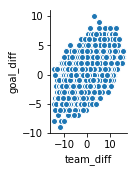

In [17]:
sns.pairplot(df8, x_vars=['team_diff'], y_vars='goal_diff', aspect=0.8)

In [18]:
col = ['team_diff']
X = df8[col]
y = df8.goal_diff
lr = LinearRegression()
lr.fit(X,y)
print("The y intercept:", lr.intercept_)
print("The single coefficient:", lr.coef_)

The y intercept: 0.3745220295400324
The single coefficient: [0.1882827]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

lr= LinearRegression()
lr.fit(X_train, y_train)

y_pred_test = lr.predict(X_test)
mae = metrics.mean_absolute_error(y_pred_test, y_test)
mse = metrics.mean_squared_error(y_pred_test, y_test)
rmse = np.sqrt(mse)
print('model with .3 split:')
print('mae:', mae, 'mse: ', mse, 'rmse: ', rmse)

model with .3 split:
mae: 1.2621512289067074 mse:  2.607355774924427 rmse:  1.6147308676446446


In [20]:
print(lr.predict(5))
print(lr.predict(-5))

[1.29659839]
[-0.56988201]


0.2020764972003222


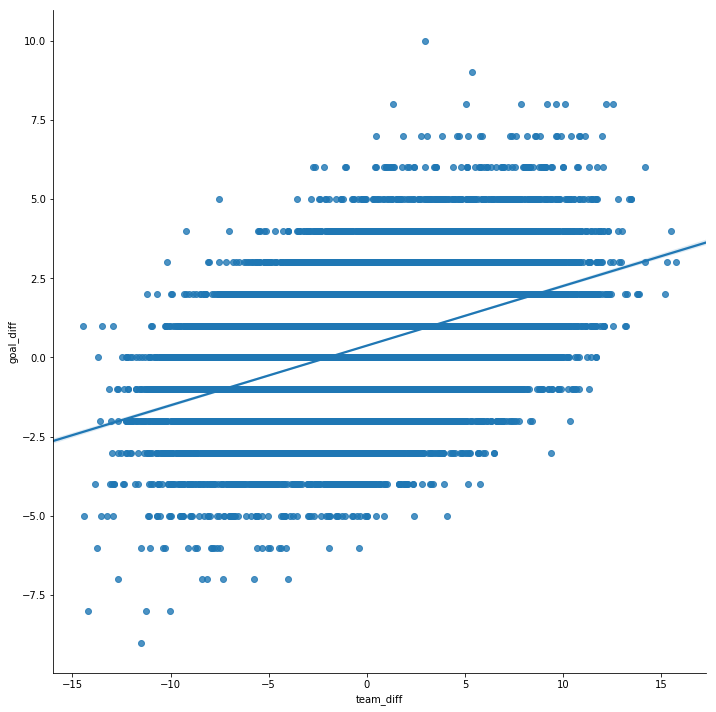

In [21]:
sns.pairplot(df8, x_vars=['team_diff'], y_vars='goal_diff', kind="reg",size = 10)
print(stats.pearsonr(X.values.flatten(),y.values)[0]**2)

In [22]:
y_pred = lr.predict(X)
metrics.r2_score(y, y_pred)

0.20202134445309616

In [23]:
#my_dict = xmltodict.parse(data1.goal[1728])

In [24]:
#for count in goal_c:
#    my_dict = xmltodict.parse(goal_c[count])
#    goal_c[count] = my_dict

In [1]:
#pd.merge(test1, data4, on='player_api_id', how='outer')